<font color="blue"><h1 align="center"> Palestra Estudantil</h1> </font> 

### Nome: Tiago Batista Souza

<font color="red"><h1 align="center"> Manipulação de Arquivos .FITS através do Python</h1> </font> 

Esta apresentação irá abordar os seguintes tópicos: 

* [1. Um pouco sobre os arquivos .fits](#1.-Um-pouco-sobre-os-arquivos-.fits)
* [2. O pacote Astropy](#2.-O-pacote-Astropy)
* [3. Abrindo um arquivo .fits](#3.-Abrindo-um-arquivo-.fits)
* [4. Exibindo o tipo de conteúdo armazenado dentro dos arquivos .fits](#4.-Exibindo-o-tipo-de-conteúdo-armazenado-dentro-dos-arquivos-.fits)
* [5. Exibir as informações contidas nos arquivos](#5.-Exibir-as-informações-contidas-nos-arquivos)
* [6. Filtrando as informações contidas no Header dos arquivos](#6.-Filtrando-as-informações-contidas-no-Header-dos-arquivos)
* [7. Editando o Header da imagem](#7.-Editando-o-Header-da-imagem)
* [8. Exibir a tabela de dados contida no arquivos 2.fits](#8.-Exibir-a-tabela-de-dados-contida-no-arquivo-2.fits)
* [9. Exibindo os espectros contidos no arquivo 2.fits](#9.-Exibindo-os-espectros-contidos-no-arquivo-2.fits)
* [10. Exibindo a imagem do campo com o catálogo sobreposto "via WCS"](#10.-Exibindo-a-imagem-do-campo-com-o-catálogo-sobreposto-"via-WCS")
* [11. Criando um arquivo .fits](#11.-Criando-um-arquivo-.fits)

## 1. Um pouco sobre os arquivos .fits

O arquivo FITS (Flexible Image Transport System) é amplamente utilizado pela comunidade Astronômica para armazenar dados (tabelas, textos (header), espectros, imagens, etc ...). Este formato de arquivo foi aprovado pela União Internacional Astronômica em 1999 e adotado pela NASA como o formato padrão para armazenamento de dados. Para mais detalhes a respeito do padrão FITS, ver o seguinte [PAPER](http://articles.adsabs.harvard.edu/cgi-bin/get_file?pdfs/A+A../0376/2001A+A...376..359H.pdf)

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 2. O pacote Astropy

O projeto **Astropy** foi desenvolvido pela comunidade científica com o intuito de criar um único pacote básico em Python voltado para a Astronomia. Dentre os diversos módulos contidos dentro do Astropy, o [Astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/) permite ler/editar/criar arquivos no formato **.fits**  
  
A instalação do Astropy pode ser feita através do comando: **pip install astropy** ou via [Anaconda](https://www.continuum.io/downloads) onde o Astropy já vez instalado por padrão.
  
Para mais detalhes a respeito da instalação, dependências e outros, ver a [Documentação](http://docs.astropy.org/en/stable/install.html).

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

<font color="green"><h1 align="center"> ####################### Partiu para os códigos ####################### </h1> </font> 

<img src="./computador.gif">

## 3. Abrindo um arquivo .fits

In [1]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'       # Melhora a resolucao do plot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pylab as plt                     # Permite fazer plots utilizando o pacote matplotlib
plt.rcParams['figure.figsize'] = (18.0, 18.0)      # Determina o tamanho do plot dentro do ipython notebook
from astropy.io import fits, votable               # Permite carregar arquivos fits e votable
from astropy.table import Table                    # Permite carregar tabelas
from astropy import wcs                            # Importa o pacote World Coordinate System
import numpy as np                                 # Importa o pacote numpy

In [2]:
hdulist  = fits.open('1.fits')    # Armazena o conteúdo do arquivo 1.fits em um objeto astropy.io.fits
hdulist2 = fits.open('2.fits')    # Armazena o conteúdo do arquivo 2.fits em um objeto astropy.io.fits

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

<img src="./tenor.gif">

## 4. Exibindo o tipo de conteúdo armazenado dentro dos arquivos .fits

In [3]:
hdulist.info()      # Permite obter informações sobre o conteúdo do arquivo 1.fits
print ; print
hdulist2.info()     # Permite obter informações sobre o conteúdo do arquivo 2.fits

Filename: 1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     179   ()      
  1  SCI         ImageHDU        71   (6218, 4608)   float32   


Filename: 2.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     179   ()      
  1  MDF         BinTableHDU    158   16R x 25C   [1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 2A, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 9A, 1J, 1J, 1J, 1J, 1J]   
  2  SCI         ImageHDU        71   (3108,)   float32   
  3  SCI         ImageHDU        71   (3108,)   float32   
  4  SCI         ImageHDU        71   (3108,)   float32   
  5  SCI         ImageHDU        71   (3108,)   float32   
  6  SCI         ImageHDU        71   (3108,)   float32   
  7  SCI         ImageHDU        71   (3108,)   float32   
  8  SCI         ImageHDU        71   (3108,)   float32   
  9  SCI         ImageHDU        71   (3108,)   float32   
 10  SCI         ImageHDU        71   (3108,)   float32   
 11  

Podemos verificar que há 3 tipos de arquivos: PrimaryHDU, ImageHDU, BinTableHDU  
** HDU** (Header Data Unit) é o componente de alto nível  da estrutura de um arquivo .fits. Consiste geralmente de um header e arrays de dados ou tabelas

* **PrimaryHDU**: É o HDU onde está contido o header principal do arquivo .fits (onde informações relevantes sobre os dados estão armazenados).
* **ImageHDU**: É uma matriz de dados de N-dimensões. Geralmente 1D (Espectro), 2D (Imagens).
* **BinTableHDU**: É uma tabela de dados. 

O arquivo **1.fits** contém o Header principal no HDU 0 e uma imagem de dimensões 6218 x 4608 no formato float32 no HDU 1. 

O arquivo **2.fits** contém o Header principal no HDU 0, uma tabela de dimensões 16linhas x 25colunas no formato float32 no HDU 1 e espectros de dimensão 3108 no formato float32 nos HDU 2-14

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 5. Exibir as informações contidas nos arquivos

In [4]:
header1 = hdulist[0].header          # armazena o header do arquivo 1.fits na variável header1
print(header1,'')                    # exibe o conteúdo do header do arquivo    

(SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2002-04-19T04:36:45' / Date FITS file was generated                  
IRAF-TLM= '14:57:55 (18/04/2002)' / Time of last modification                   
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
INSTRUME= 'GMOS-N  '           / Instrument used to acquire data                
OBJECT  = 'NGC6940 '       

 [astropy.io.fits.verify]


In [8]:
header2 = hdulist2[0].header           # armazena o header do arquivo 2.fits na variável header1
print(header2,"")                      # exibe todo o header do arquivo 2.fits

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2002-04-19T04:39:39' / Date FITS file was generated                  
IRAF-TLM= '17:32:09 (18/04/2002)' / Time of last modification                   
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
INSTRUME= 'GMOS-N  '           / Instrument used to acquire data                
OBJECT  = 'NGC6940 '        

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 6. Filtrando as informações contidas no Header dos arquivos

In [9]:
print('Nome do objeto: %s\nRA_central: %s\nDEC_central %s\nData da observação: %s\nObservatório: %s\nInstrumento: %s'
      %(header1['OBJECT'],header1['RA'],header1['DEC'],header1['DATE-OBS'],header1['OBSERVAT'],header1['INSTRUME']))

Nome do objeto: NGC6940
RA_central: 308.60704167
DEC_central 28.27555556
Data da observação: 2001-08-14
Observatório: Gemini-North
Instrumento: GMOS-N


In [10]:
print('Nome do objeto: %s\nRA_central: %s\nDEC_central %s\nData da observação: %s\nObservatório: %s\nInstrumento: %s'
      %(header2['OBJECT'],header2['RA'],header2['DEC'],header2['DATE-OBS'],header2['OBSERVAT'],header2['INSTRUME']))


Nome do objeto: NGC6940
RA_central: 308.60704167
DEC_central 28.27555556
Data da observação: 2001-08-26
Observatório: Gemini-North
Instrumento: GMOS-N


[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 7. Editando o Header da imagem

In [16]:
lista = 2*np.arange(10)
print lista
lista[0:6]

[ 0  2  4  6  8 10 12 14 16 18]


array([ 0,  2,  4,  6,  8, 10])

In [24]:
print(header2[:10],"")                 # Exibindo informações das de uma parte do header 
print(80*"*")


print(header2['OBJECT'])               # acessando a informação contida no header através da chave "OBJECT"
print(header2[12])                     # acessando a mesma informação anterior, mas agora através de um índice
print(80*"*")

print(header2.comments['OBJECT'])              # acessando o comentário da informação contida na chave "OBJECT"
print(80*"*")

header2['OBJECT'] = ('NGC6940_new', 'Object Name_new') # muda a informação e o comentário da chave "OBJECT"
print(header2['OBJECT'])                       # Verificando se a informação mudou   
print(header2.comments['OBJECT'])              # Verificando se o comentário mudou
print(80*"*")

print(header2.keys())                        # Lista todas as chaves contidas no header
header2.set('data_Tiago1', 10, 'comment 1')  # Adiconando uma nova chave e seu comentário 
header2.set('data_Tiago2', 20, 'comment 2')  # Adiconando uma nova chave e seu comentário 
print(header2,"")
hdulist2.writeto('newimage.fits',overwrite=True) # criando um novo arquivo chamado newimage.fits com as modificações

(SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
DATE    = '2002-04-19T04:39:39' / Date FITS file was generated                  
IRAF-TLM= '17:32:09 (18/04/2002)' / Time of last modification                   
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   , '')
********************************************************************************
NGC6940_new
NGC6940_new
*******************************************************************************

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 8. Exibir a tabela de dados contida no arquivo 2.fits

Sabendo que a tabela está armazenada na posição 1 do arquivo 2.fits podemos exibi-la utilizando os comandos a seguir.

In [26]:
data = hdulist2[1].data                # Armazenando a tabela contida na HDU-1 do arquivo 2.fits no objeto data
print(data.columns)                    # mostra o nome e o formato de cada uma das colunas da tabela de dados

t = Table(data)                        # armazena a tabela na variavel t
print(t) ; print
print('O número total de objetos na tabela é %d' %len(t))

#criando um arquivo votable chamado "tabela_votable.xml" a partir da tabela de dados.
tab_vo = votable.from_table(t)
votable.writeto(tab_vo, "tabela_votable.xml")   

ColDefs(
    name = 'ID'; format = '1J'; unit = '#'; null = -2147483647; disp = 'I6'
    name = 'RA'; format = '1E'; unit = 'deg'; disp = 'F13.3'
    name = 'DEC'; format = '1E'; unit = 'deg'; disp = 'F13.3'
    name = 'x_ccd'; format = '1E'; unit = 'pixels'; disp = 'F13.3'
    name = 'y_ccd'; format = '1E'; unit = 'pixels'; disp = 'F13.3'
    name = 'slitpos_x'; format = '1E'; unit = 'arcsec'; disp = 'F13.3'
    name = 'slitpos_y'; format = '1E'; unit = 'arcsec'; disp = 'F13.3'
    name = 'slitsize_x'; format = '1E'; unit = 'arcsec'; disp = 'F13.3'
    name = 'slitsize_y'; format = '1E'; unit = 'arcsec'; disp = 'F13.3'
    name = 'slittilt'; format = '1E'; unit = 'deg'; disp = 'F13.3'
    name = 'priority'; format = '2A'; unit = 'c'; disp = 'A10'
    name = 'slitpos_mx'; format = '1E'; disp = 'F9.6'
    name = 'slitpos_my'; format = '1E'; disp = 'F9.6'
    name = 'slitid'; format = '1E'; disp = 'I4'
    name = 'slitsize_mx'; format = '1E'; disp = 'F8.6'
    name = 'slitsize_my'; forma

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 9. Exibindo os espectros contidos no arquivo 2.fits

Sabendo que os espectros estão armazenados nas posições 2 à 14 do arquivo 2.fits, podemos exibi-la utilizando os comandos a seguir.

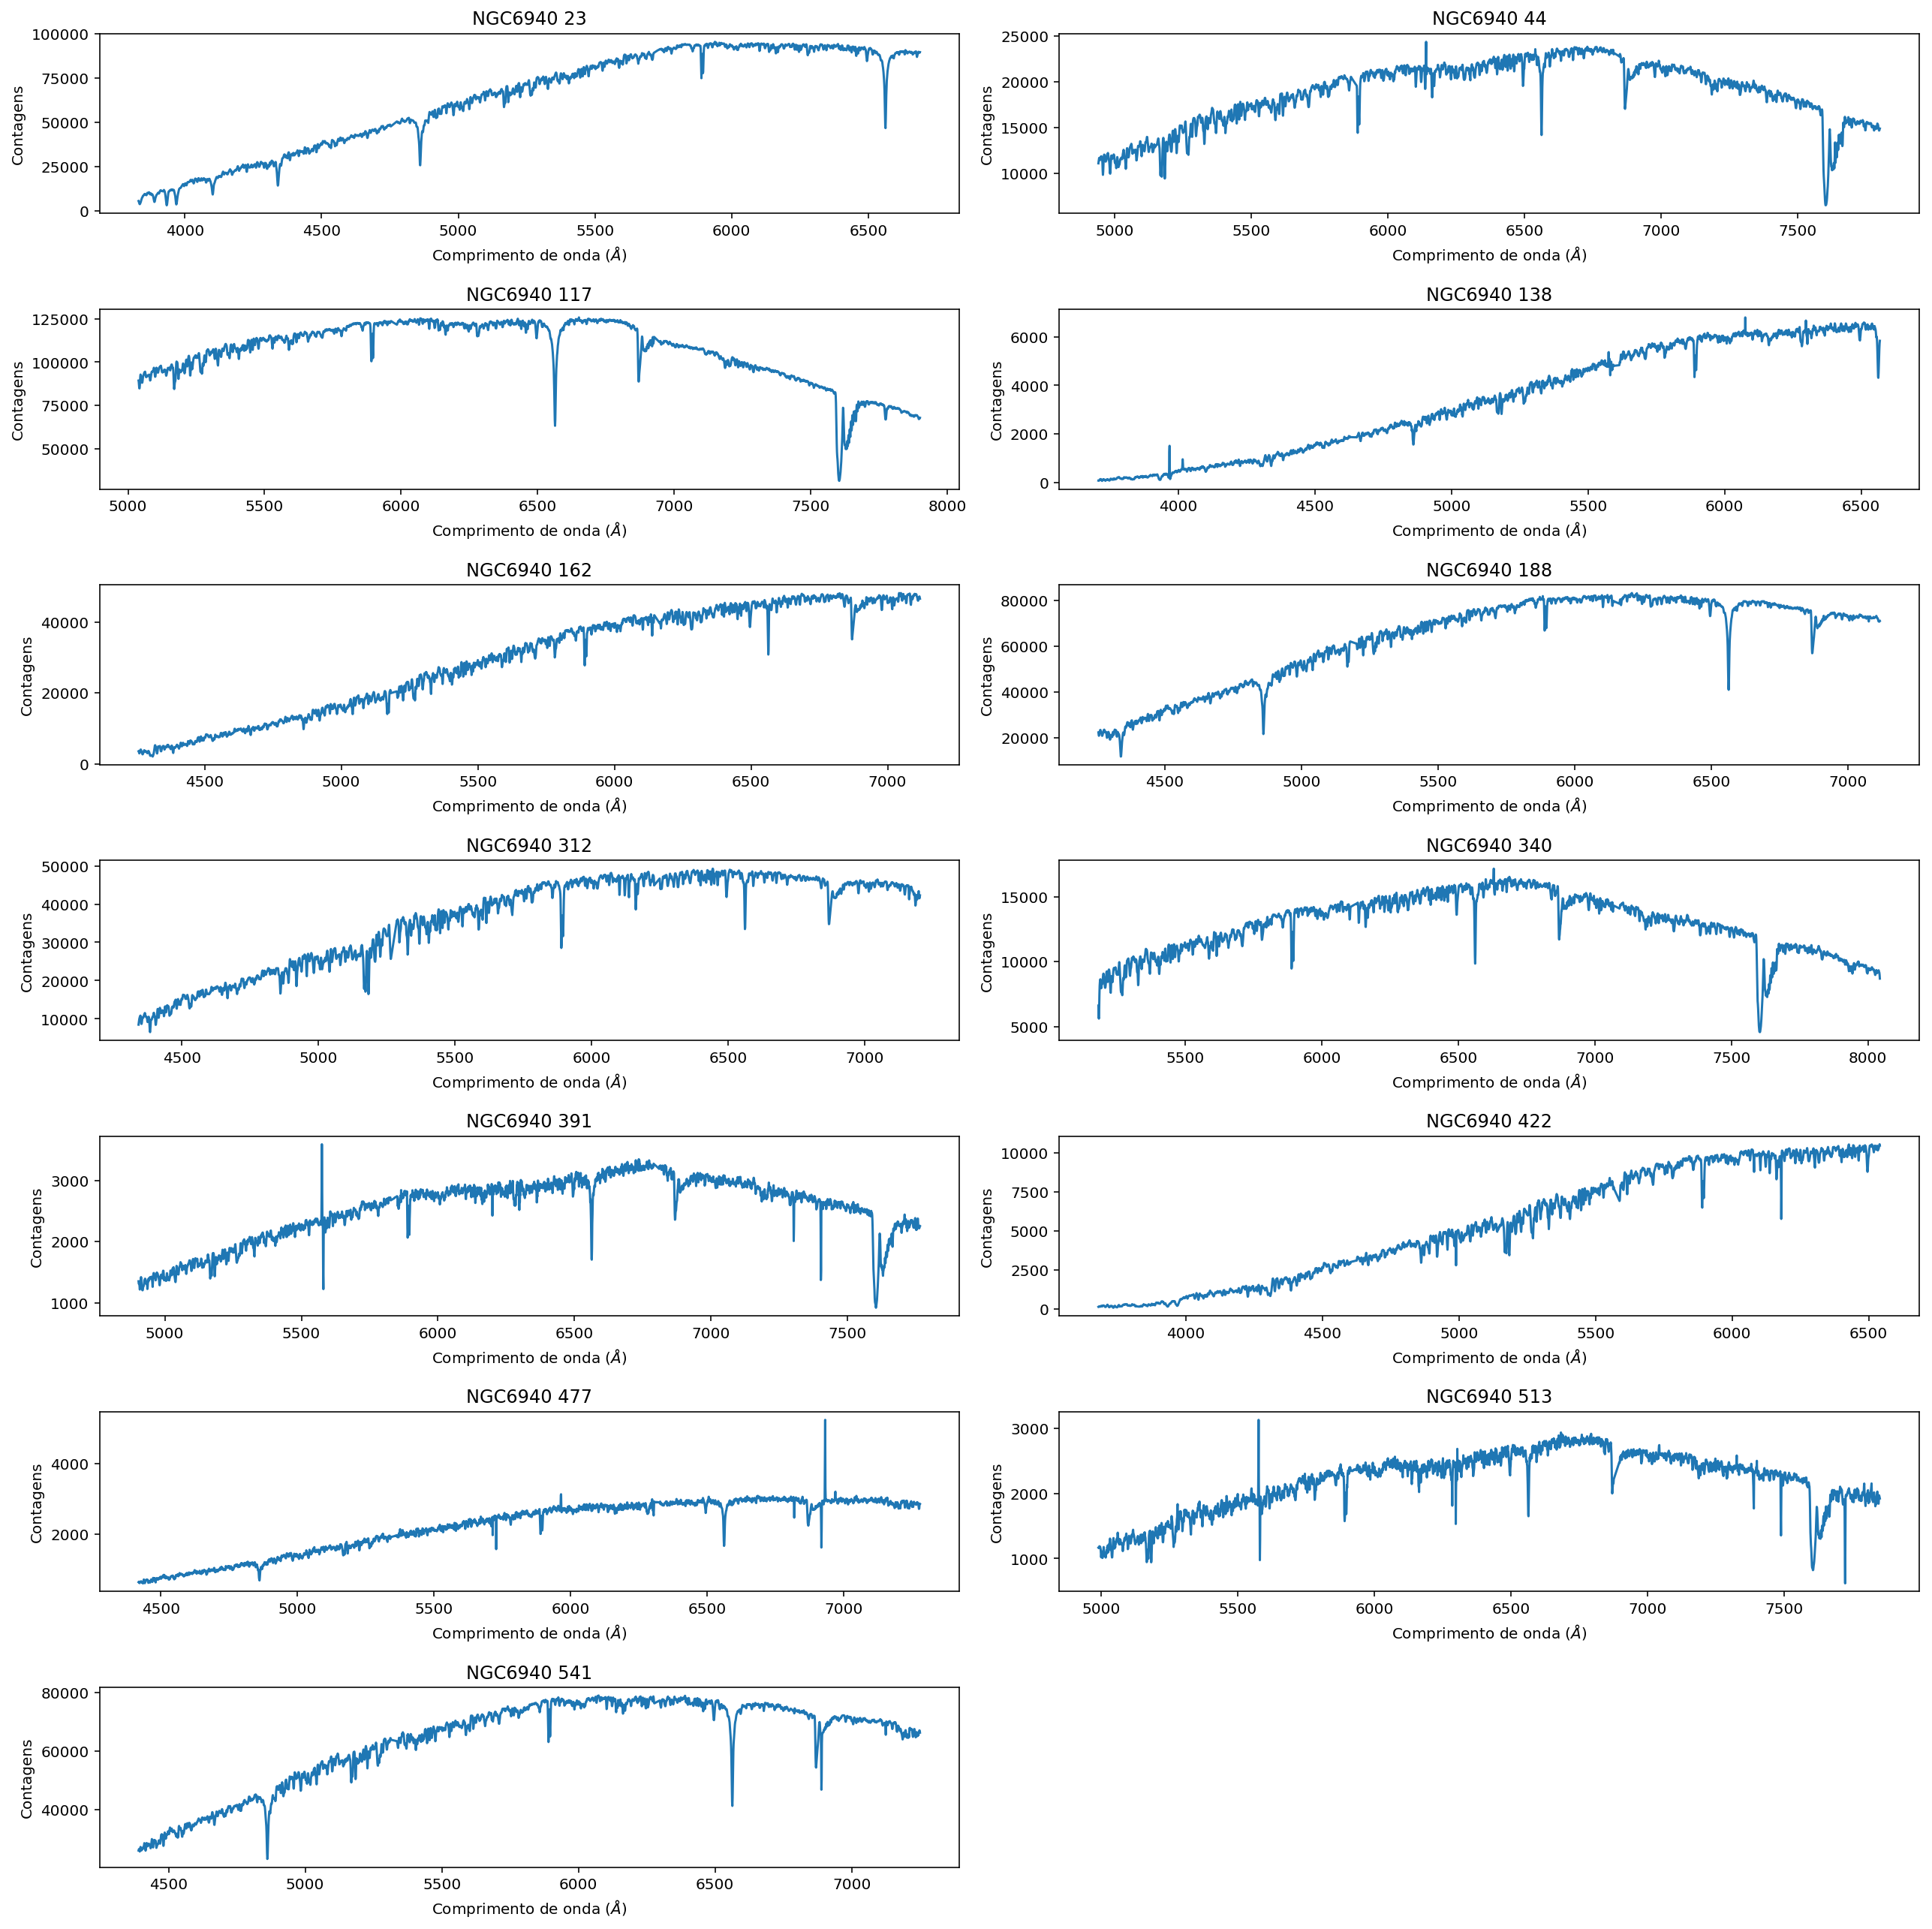

In [27]:
for l in range(2,15):                                           
    plt.subplot(7,2,l-1)                                        # cria os subplots com 7 linhas e 2 colunas  
    flux = hdulist2[l].data                                     # extrai o array contendo os valores de fluxo
    ref_pixel = hdulist2[l].header['CRPIX1']                    # Obtem o valor do pixel de referência
    coord_ref_pixel = hdulist2[l].header['CRVAL1']              # obtem o lambda do pixel de referência
    wave_pixel = hdulist2[l].header['CDELT1']                   # obtém o valor de lambda por pixel
    wstart =  coord_ref_pixel-((ref_pixel-1)*wave_pixel)        # Obtém o lambda inicial (do pixel 1)
    wave = [wstart + i*wave_pixel for i in range(len(flux))]    # Obtém o array contendo os valores de labda
    plt.title('NGC6940 '+hdulist2[l].header['object'])          # Dá o título do plot
    plt.plot(wave,flux)                                         # plota contagens x comprimento de onda
    plt.xlabel('Comprimento de onda ($\AA$)')                   # Dá o nome do eixo X do plot
    plt.ylabel('Contagens')                                     # Dá o nome do eixo Y do plot
plt.tight_layout()                                              # organiza o layout dos plots
plt.show()                                                      # exibe os plots (espectros)
plt.close()                                                     # Fecha a figura

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 10. Exibindo a imagem do campo com o catálogo sobreposto "via WCS"

Vamos utiliza o módulo WCS do astropy para poder converter os dados de posição de cada um dos objetos da tabela
(RA e DEC) para a sua posição XY correspondente no ccd da imagem. Desta forma vamos poder identificar as estrelas pertencentes ao cátalogo que estão presentes na imagem ao plotar o catálogo sobreposto a imagem. Para isso vamos utilizar os comandos a seguir. Podemos observar que por algum motivo há uma pequena translação em relação posição da estrela da imagem e da calculada pelo WCS.

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 308.60695699925799  28.275560323917599  
CRPIX : 3066.6094105701  2289.5383712963599  
CD1_1 CD1_2  : -2.0203886051489002e-05  1.7574964632255999e-08  
CD2_1 CD2_2  : 2.34866671962205e-08  2.02198394066576e-05  
NAXIS : 0  0
(array(1527.4588101316378), array(221.7511335423801))
(array(4420.66004917585), array(390.9658002759286))
(array(2740.1220637401284), array(575.7553096438025))
(array(4673.787046818982), array(902.108844112722))
(array(1201.2252092183921), array(1150.5428520688492))
(array(2603.8121144901597), array(1359.3392758273776))
(array(2594.719810831163), array(1589.8002226279154))
(array(3118.2343229583666), array(2353.720489783829))
(array(2815.1357401212344), array(2565.756073948294))
(array(5051.258011747962), array(2750.017421185916))
(array(4299.94760855367), array(3087.4210406167135))
(array(1132.0620822803917), array(3321.2898630849963))
(array(3572.800389564498), array(3589.7014087485263))

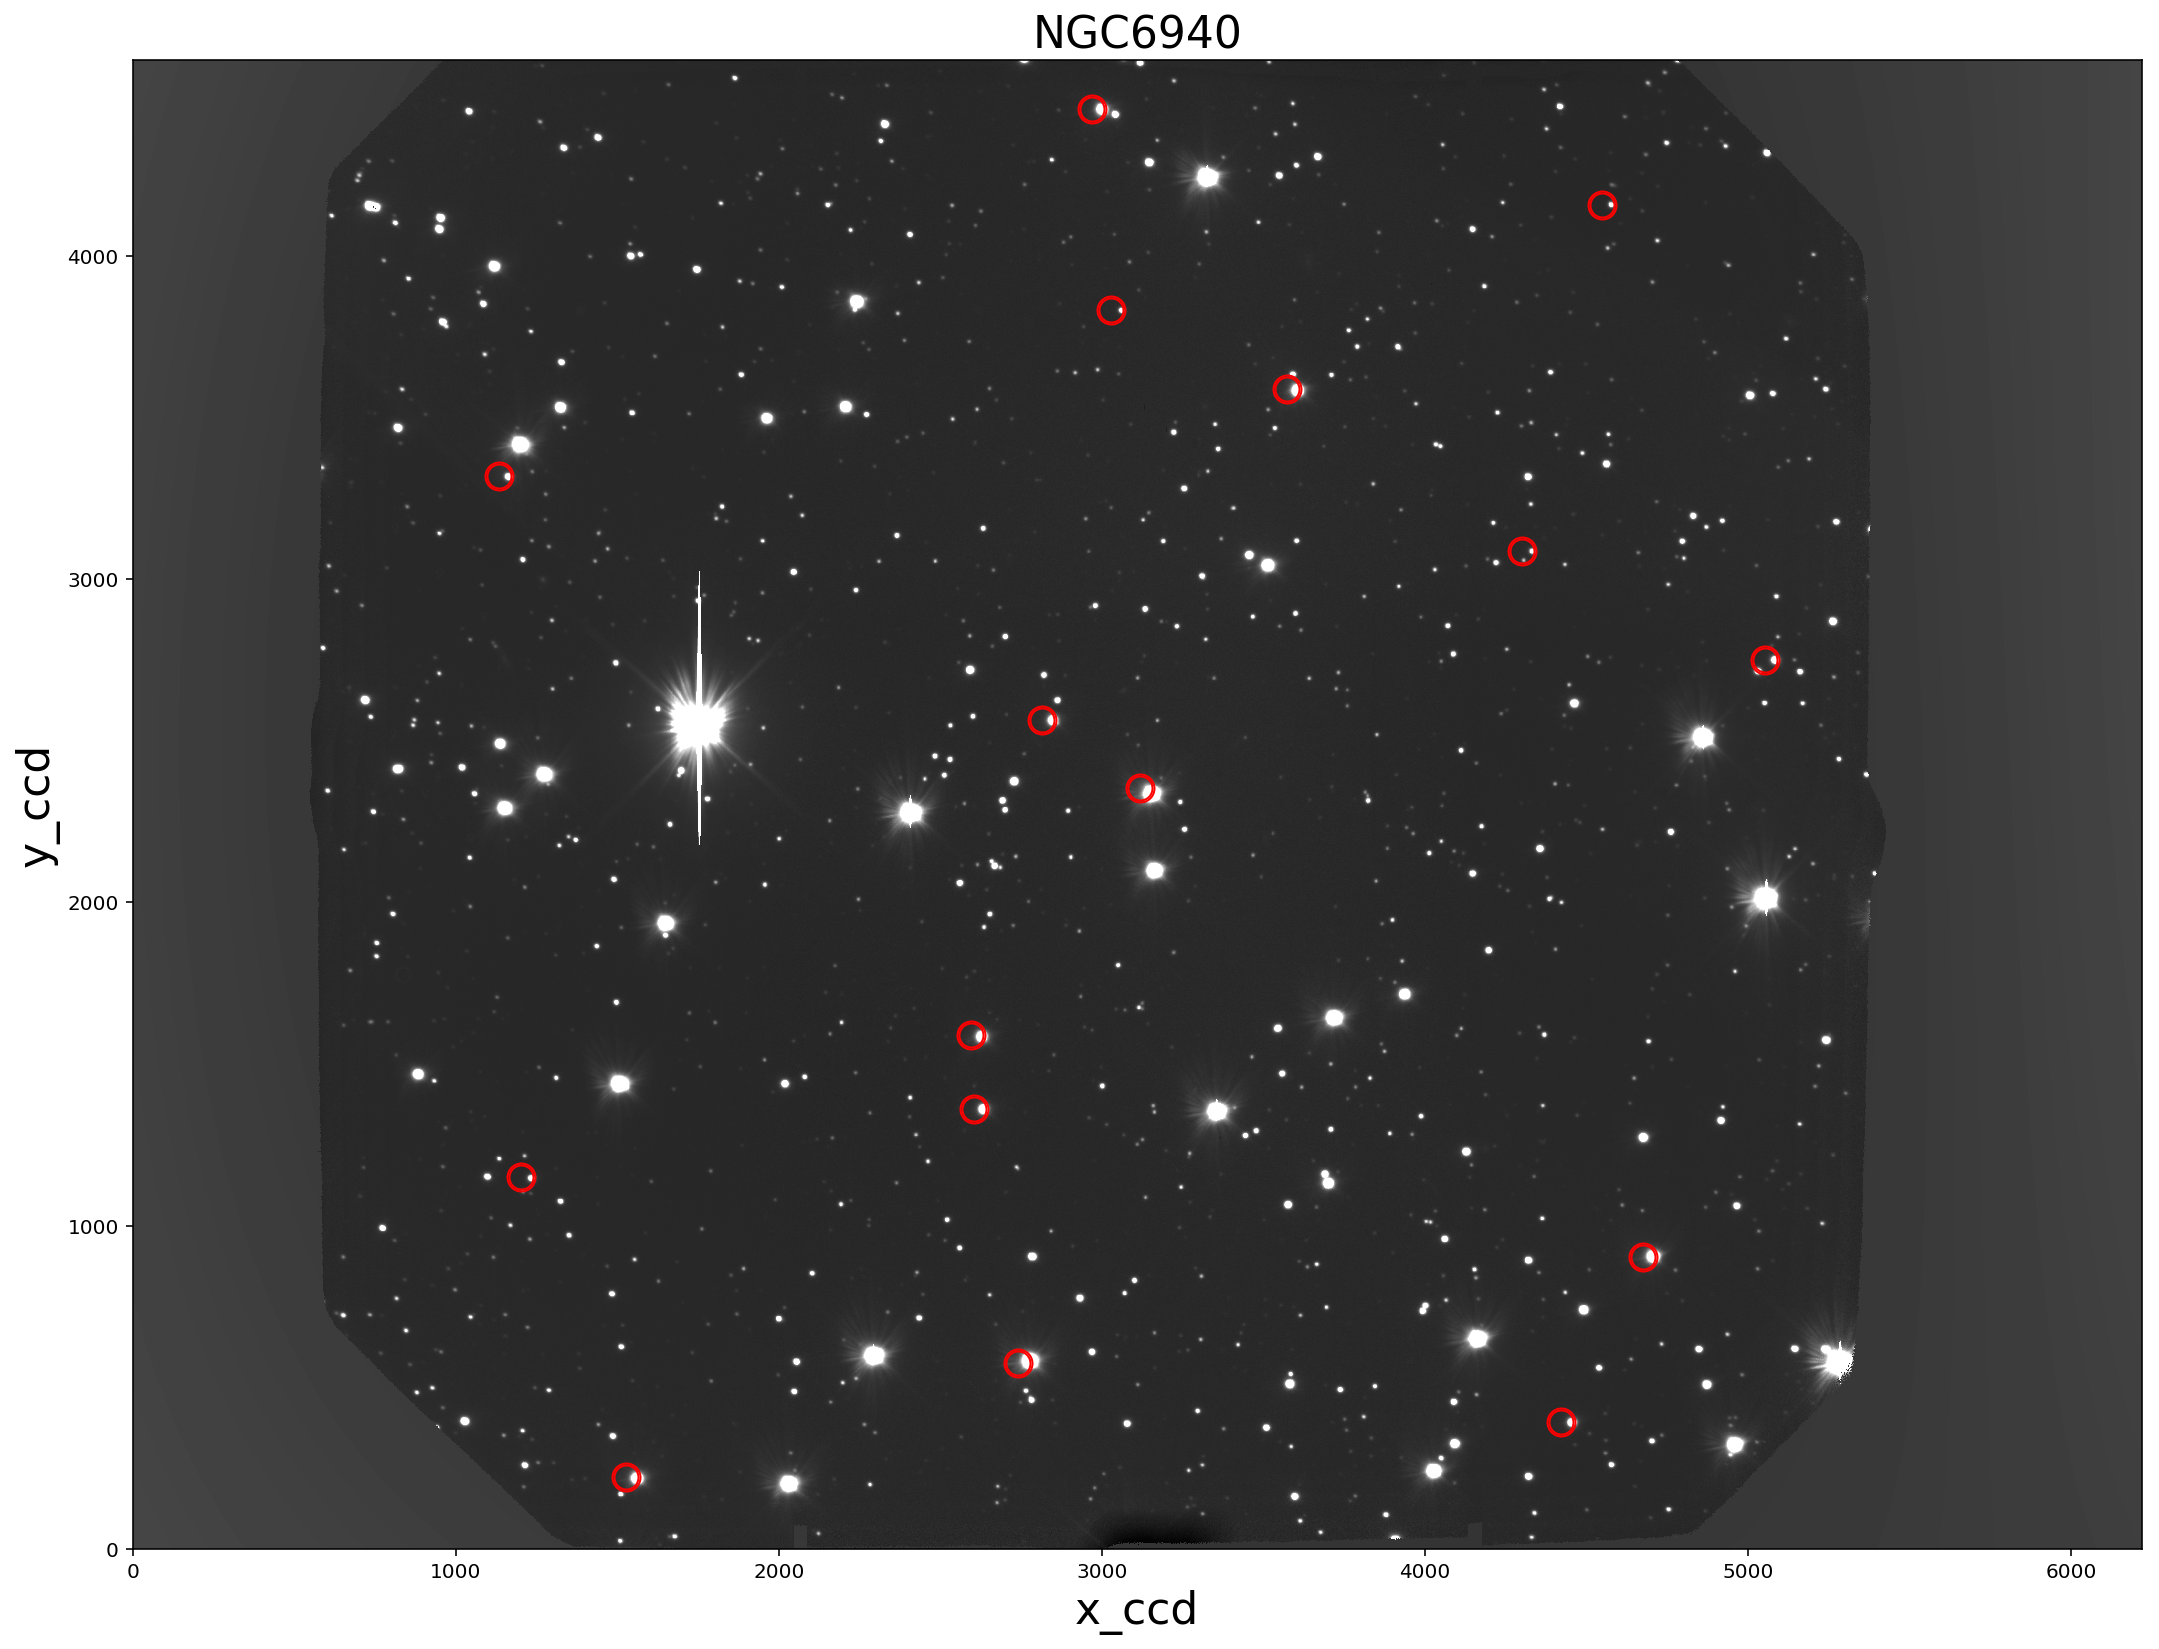

In [29]:
w = wcs.WCS(header1)                      # extrai as informações necessárias para o wcs do Header da imagem
print(w)

img = hdulist[1].data                     
plt.imshow(img, vmin=50, vmax=1800, cmap='gray')         # plota a imagem 
for ra, dec in zip(t['RA'],t['DEC']):                    # extrai o ra e dec da tabela.
    x,y = w.all_world2pix(ra, dec, 1)                    # utiliza o ra e dec do catálogo e converte para pixels 
    print(x,y)
    plt.plot(x,y, 'ro', markersize=12, fillstyle='none') # cria uma circunferência ao redor do objeto
    plt.plot(x,y, 'ro', markersize=14, fillstyle='none') # cria uma circunferência ao redor do objeto
plt.title('NGC6940',fontsize=22)                         # Dá o título da imagem
plt.xlabel('x_ccd',fontsize=22)                          # Dá o nome do eixo X do plot    
plt.ylabel('y_ccd',fontsize=22)                          # Dá o nome do eixo Y do plot
plt.xlim(0,6218)                                         # Dá os valores limites do eixo X
plt.ylim(0,4608)                                         # Dá os valores limites do eixo Y
plt.show()                                               # Exibe a imagem
plt.close()


           ### imagem do campo com o catálogo sobreposto (via dados de x_ccd e y_ccd contidos na tabela) ###
     
Dentro da propria tabela com a posição de cada um dos objetos dados em RA e DEC também há as posições XY correspondentes a sua localização no CCD. Ao plotar utilizando esses dados vemos que há uma maior precisão em relação ao meétodo aplicando anteriormente (via WCS). A seguir os comandos utilizados a partir dos dados x_ccd e y_ccd contidos na tabela.

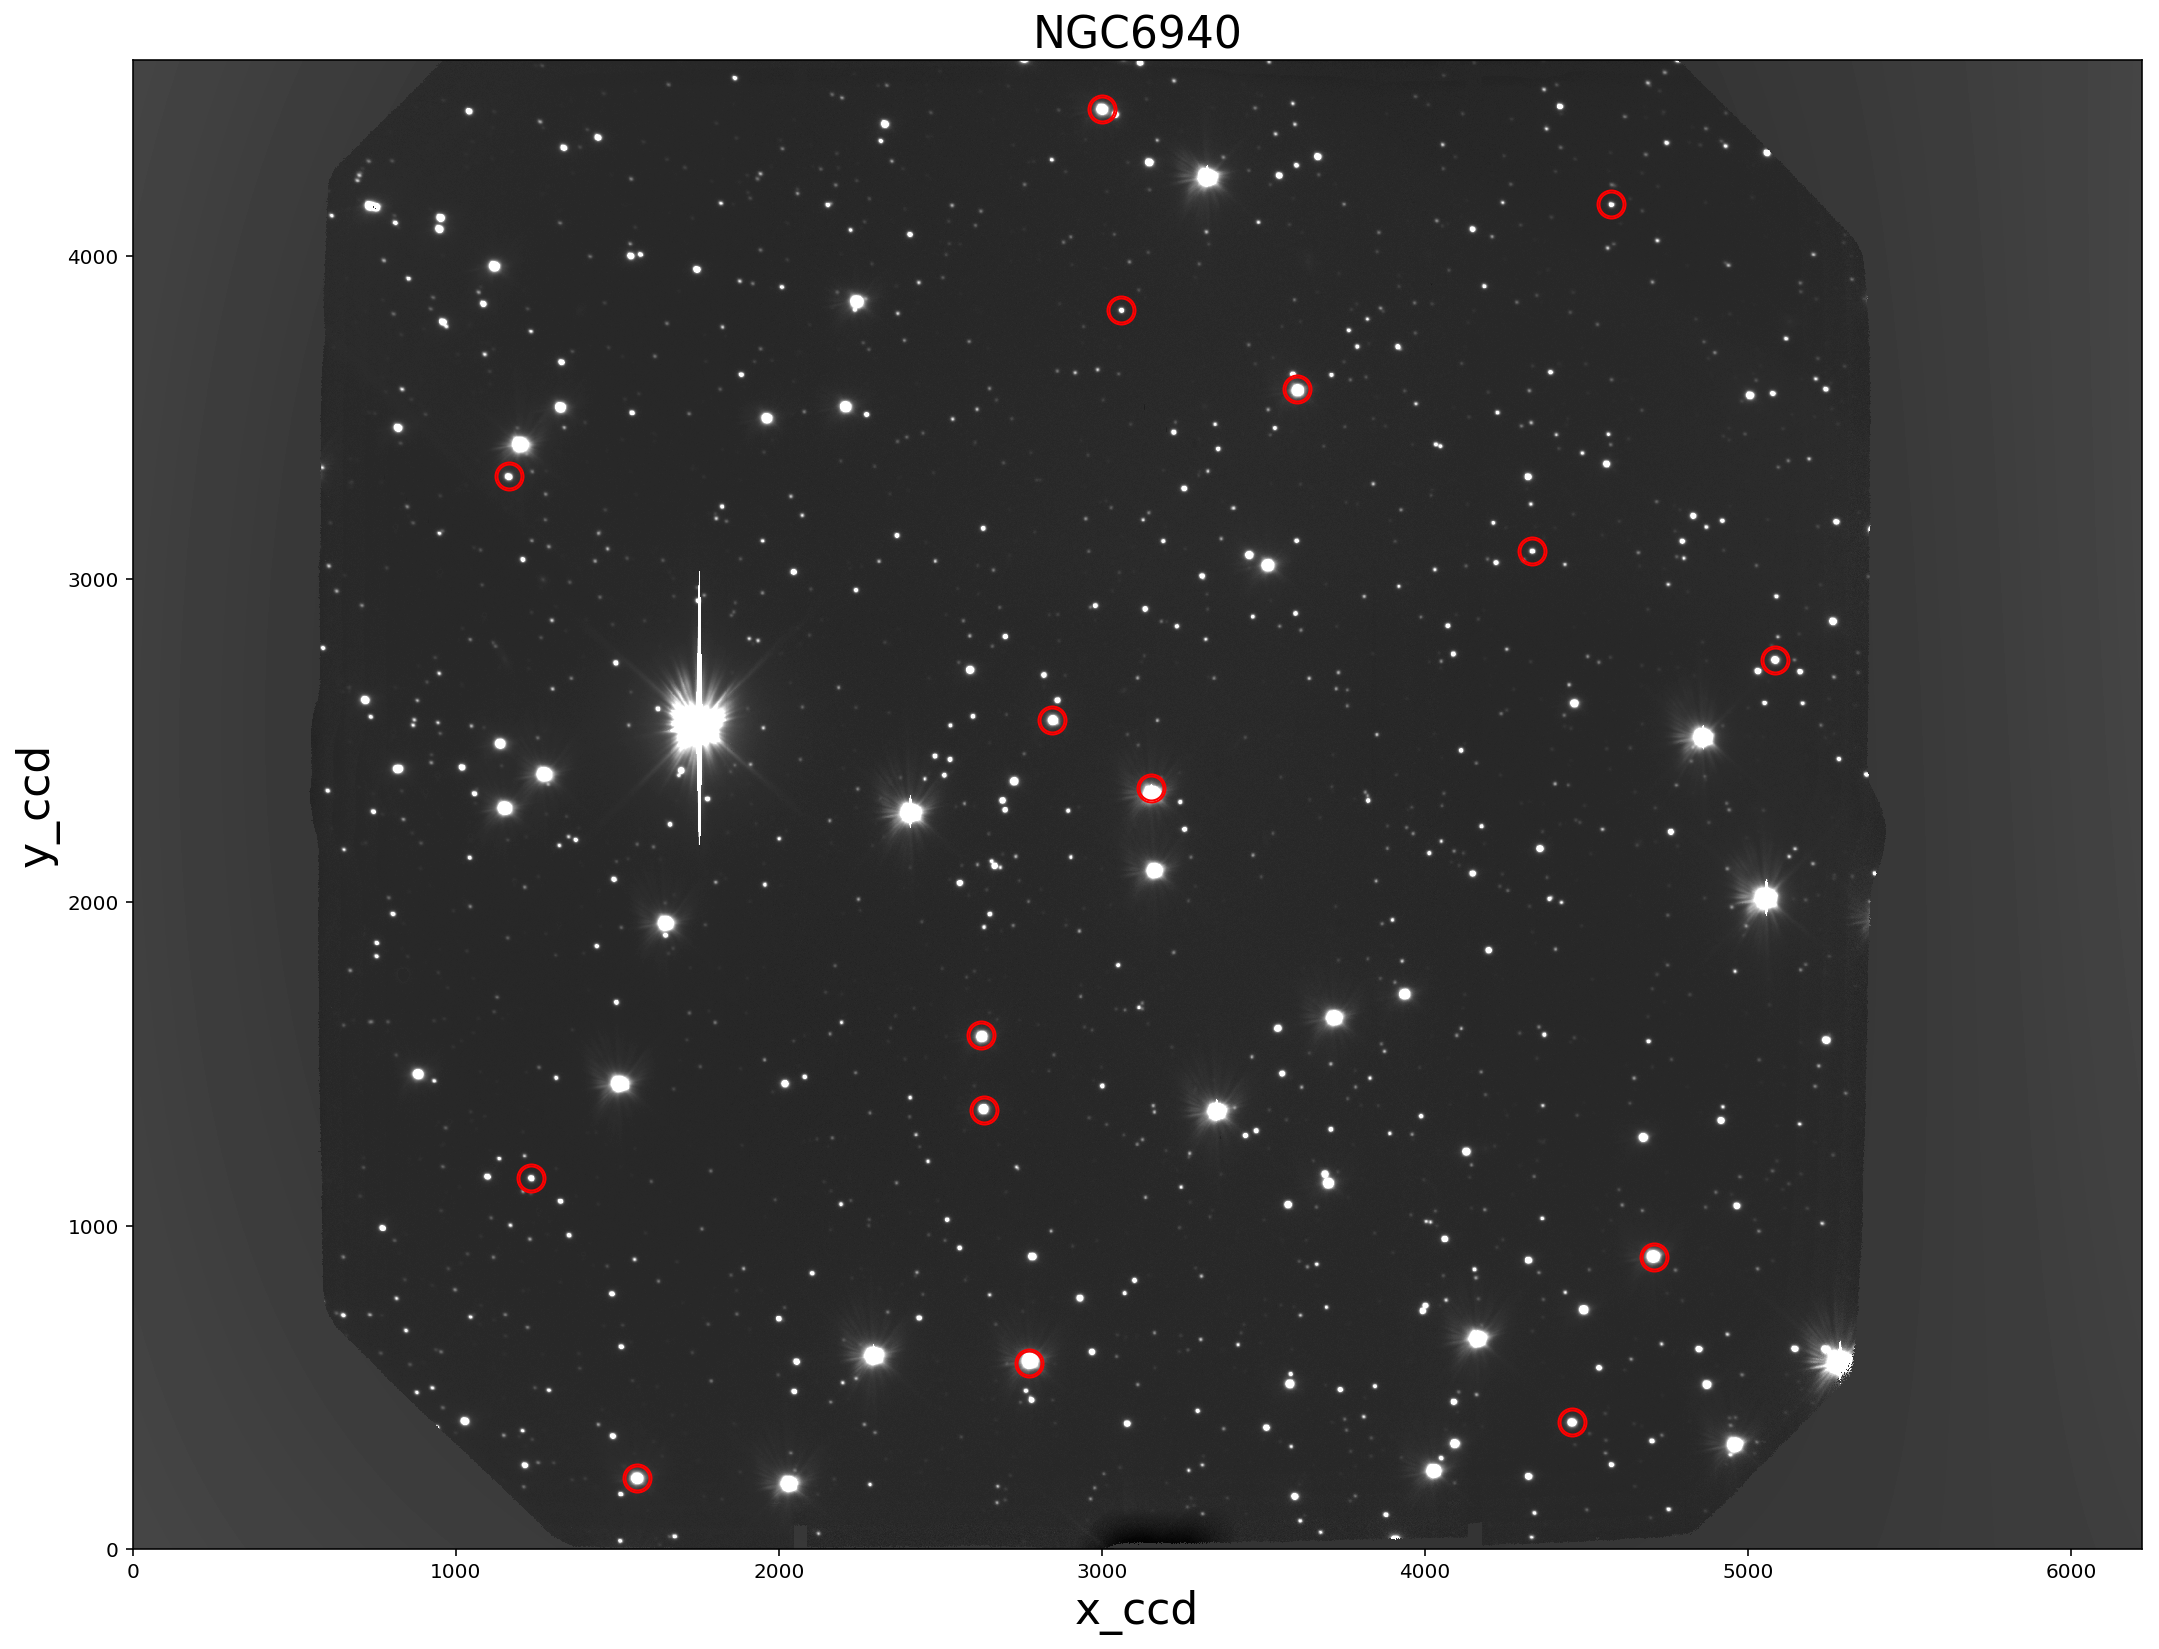

In [30]:
plt.imshow(img, vmin=50, vmax=1800, cmap='gray')
for x1, y1 in zip(t['x_ccd'],t['y_ccd']):
    plt.plot(x1,y1, 'ro', markersize=12, fillstyle='none')
    plt.plot(x1,y1, 'ro', markersize=14, fillstyle='none')
plt.title('NGC6940',fontsize=22)
plt.xlabel('x_ccd',fontsize=22)
plt.ylabel('y_ccd',fontsize=22)
plt.xlim(0,6218)
plt.ylim(0,4608)
plt.show()
plt.close()

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

## 11. Criando um arquivo .fits

In [31]:
###################### Criando o PrimaryHDU (armazena o header principal) ######################

def header_create(header_file,type_hdu="PrimaryHDU"):
    # lê o arquivo cvs contendo o header que deseja adicionar a imagem
    keys, value, comments = np.loadtxt(header_file,dtype="string",delimiter=",",unpack=True)
    # Cria um header através da instância fits.Header()
    new_header = fits.Header()

    # Cada valor de keys, value e comments será adicionado a new_header
    for x, y, z in zip(keys, value, comments):
        new_header.set(str(x),str(y),str(z))
    if type_hdu == "PrimaryHDU":
        header_out = fits.PrimaryHDU(header=new_header)
    if type_hdu == "ImageHDU" or type_hdu == "BinTableHDU":
        header_out = new_header
    return(header_out)

pri_hdu = header_create("header.txt",type_hdu="PrimaryHDU")
###################### Criando o  BinTableHDU (segundo HDU) ######################


table_vo = votable.parse_single_table("tabela_votable.xml")
data = table_vo.array
cols = fits.ColDefs(data)
sec_hdu = fits.BinTableHDU.from_columns(cols)

###################### Criando o  ImageHDU (terceiro HDU) ######################

# lê o arquivo cvs contendo o header que deseja adicionar a imagem
wave,flux = np.loadtxt("my_star.txt",dtype="float",unpack=True)
ter_hdu_header =  header_create("2_h2.txt",type_hdu="ImageHDU")

ter_hdu = fits.ImageHDU(data=flux, header=ter_hdu_header)

###################### Criando a lista de HDU e salvando o arquivo .fits ######################

thdulist = fits.HDUList([pri_hdu, sec_hdu, ter_hdu])
thdulist.writeto('table_test.fits',overwrite=True)

[Retornar ao início](#Nome:-Tiago-Batista-Souza)

<font color="red"><h1 align="center"> Isso é tudo pessoal</h1> </font> 

<img src="./obrigado.gif">